# PCA & t-SNE Visualization
 PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are powerful techniques for visualizing high-dimensional data in lower dimensions (typically 2D or 3D). They help in understanding the structure and patterns within the data.
 
This notebook demonstrates dimensionality reduction (PCA) and non-linear embedding (t-SNE) for visualization.
Topics:
- When to use PCA vs t-SNE
- Preprocessing required
- Visual interpretation


## Setup and data
Load dataset and prepare numeric features.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_theme()
df = sns.load_dataset('titanic').copy()
# select numeric features and dropna for simplicity
num = df[['age','fare','sibsp','parch']].dropna()
num.shape


(714, 4)

## PCA: linear dimension reduction
1) Standardize features
2) Fit PCA
3) Inspect explained variance and plot components


Explained variance ratios: [0.40918758 0.27679424]


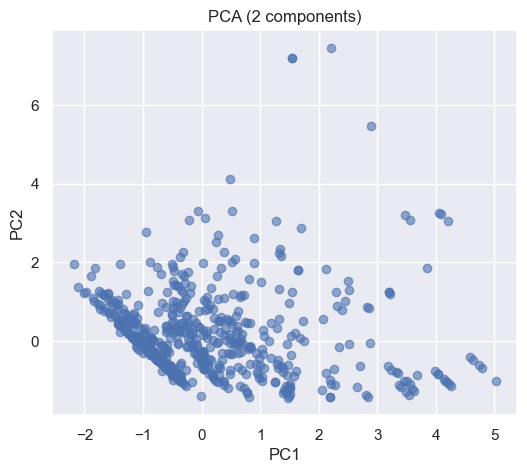

In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratios:', pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 components)')
plt.show()


## t-SNE: non-linear embedding for visualization
t-SNE captures local structure well but is computationally expensive and stochastic. Useful for visualizing clusters.


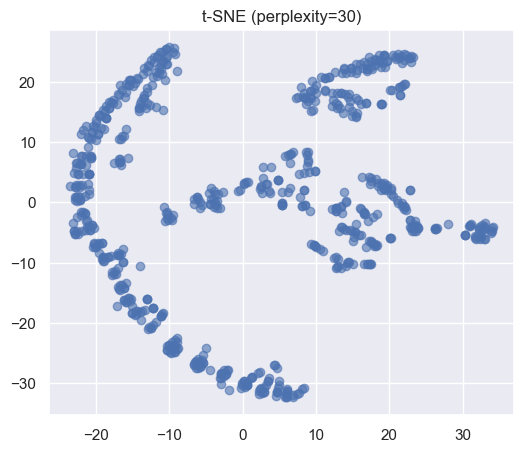

In [3]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
plt.title('t-SNE (perplexity=30)')
plt.show()


## Coloring by target / category
Color embeddings by survival or passenger class to identify separations.


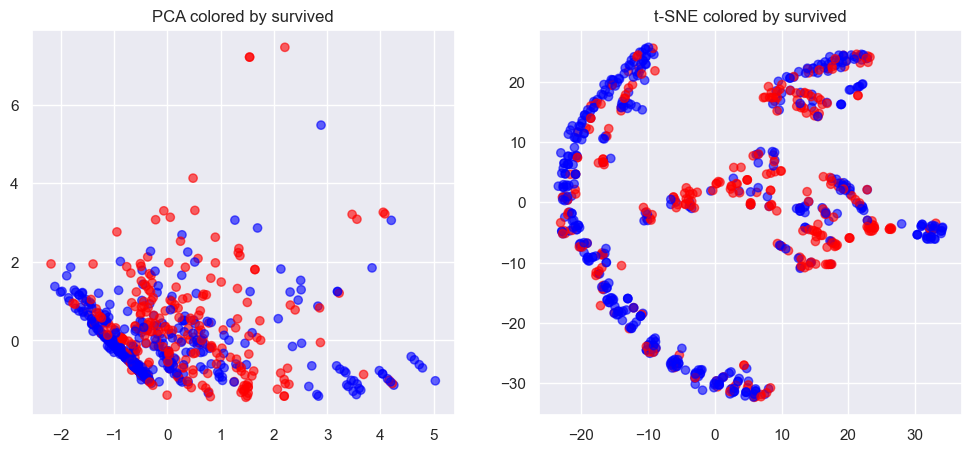

In [4]:
labels = df.loc[num.index, 'survived']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='bwr', alpha=0.6)
plt.title('PCA colored by survived')
plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='bwr', alpha=0.6)
plt.title('t-SNE colored by survived')
plt.show()


## Exercises
1. Try different `perplexity` values (5,30,50) for t-SNE and compare plots.
2. Run PCA with 3 components and visualize PC1 vs PC3. What changes?
3. Apply PCA before t-SNE (reduce to 10 dims) and observe speed/quality differences.
